Linhas e Colunas: (100, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       100 non-null    int64 
 1   Name       100 non-null    object
 2   CS Rating  100 non-null    object
 3   Region     100 non-null    object
 4   Wins       100 non-null    int64 
 5   Ties       100 non-null    int64 
 6   Losses     100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB
Nulos:
 Rank         0
Name         0
CS Rating    0
Region       0
Wins         0
Ties         0
Losses       0
dtype: int64
Duplicatas: 0
Rank: limites -48.5 149.5
Wins: limites -101.0 269.0
Ties: limites -3.375 5.625
Losses: limites -48.5 99.5


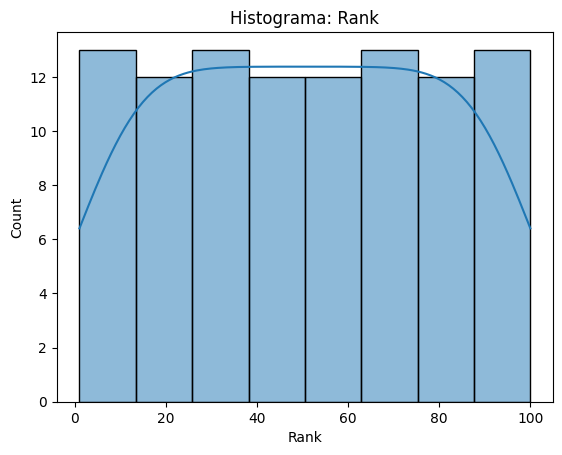

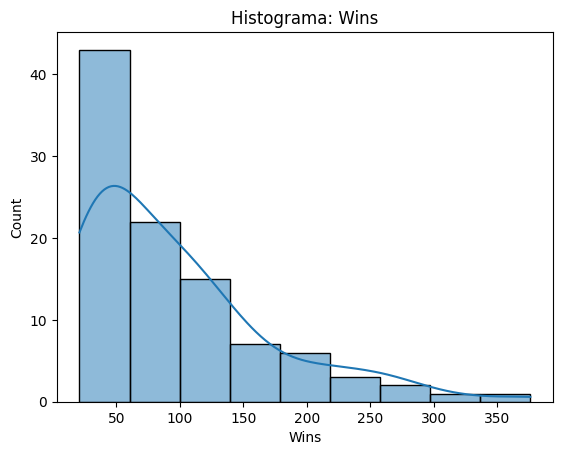

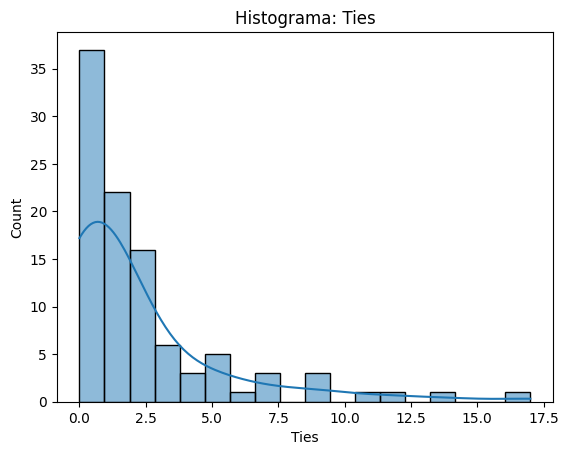

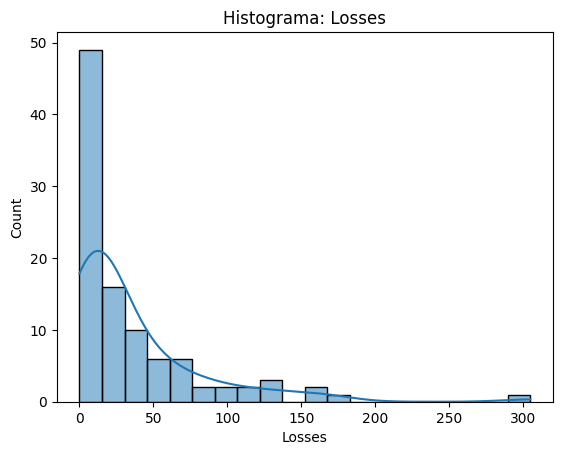

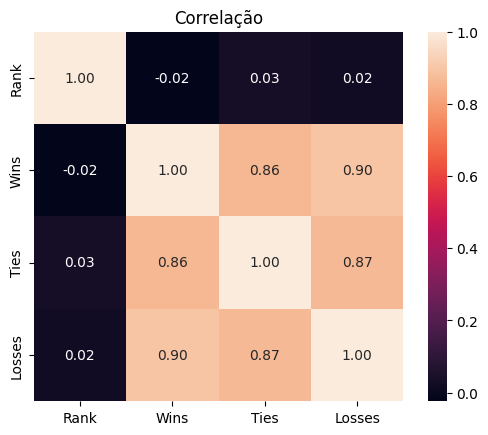

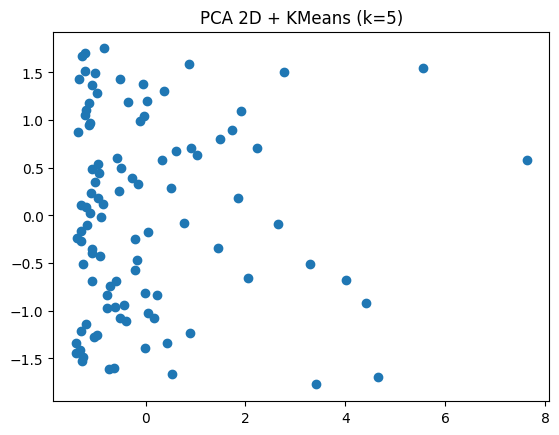

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from scipy import stats

# 1. Carregar Dataset
df = pd.read_csv("../data/top_100_players.csv")

# 2. Infos básicas
print("Linhas e Colunas:", df.shape)
df.info()
df.head()

# 3. Checar Nulos
print("Nulos:\n", df.isna().sum())

# 4. Checar duplicatas
print("Duplicatas:", df.duplicated().sum())

# 5. Estatísticas descritivas
df.describe(include="all")

# 6. Outliers (IQR)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    print(f"{col}: limites", lower, upper)

# 7. Visualizações numéricas (6)
for col in numeric_cols[:6]:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma: {col}")
    plt.show()

# 8. Correlação
if len(numeric_cols) >= 2:
    plt.figure()
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", square=True)
    plt.title("Correlação")
    plt.show()

# 9. PCA 2D + Clusters
X = df[numeric_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)
Xp = PCA(n_components=2).fit_transform(X_scaled)

k = min(5, max(2, int(math.sqrt(len(X)))))
labels = KMeans(n_init=10, n_clusters=k, random_state=42).fit_predict(Xp)

plt.figure()
plt.scatter(Xp[:,0], Xp[:,1])  # cores automáticas, sem definir
plt.title(f"PCA 2D + KMeans (k={k})")
plt.show()
